In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA

In [2]:
#Load the training data and Labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

#Load the test data and Labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


## Output
##### 1.We have 60K train cases, 10K test cases.
##### 2. Each example is a 28 x 28 matrix representing the greyscale values.

### OR Load data by 

In [3]:
# Load the npz file
dataset = np.load('X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


### Accessing Sample from Train 

In [4]:
#Accessing from X_train = X_train[90] refers to the 91st sample in the training dataset X_train.
sample_train = X_train[90]

###  sample_train likely represents a flattened image where each pixel is represented as a single value in a 1-dimensional array. 

### By reshaping it into a 28x28 matrix, you're essentially reconstructing the original image format.

In [5]:
sample_train_img = sample_train.reshape(28,28)

## Plot

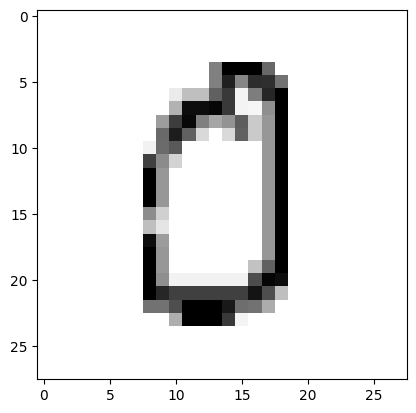

In [6]:
plt.imshow(sample_train_img,cmap=matplotlib.cm.binary,interpolation="nearest")

##### 1.sample_train_img is the variable representing the image you want to display.
##### 2.cmap='binary' sets the colormap to binary, which will display the image in black and white.
##### 3.interpolation='nearest' sets the interpolation method to 'nearest', which means each pixel in the image will be displayed without interpolation, preserving the original pixel values.

In [7]:
# To access the label of the 91st sample in your training labels
y_train[90]

0

### Perform PCA to 10 components.

In [8]:
#So now we have train and test images of data in 10 dimension instead of 28X28 dimension.

#reshapes the training data X_train into a two-dimensional array, where each row represents a sample and each column represents a feature.
X_train_2d = X_train.reshape(X_train.shape[0],-1)  #X train numpy array or Pd dataframe #(X_train.shape[0], -1), the tuple specifies the dimensions to which you want to reshape the array X_train.

#reshapes the test data X_test in the same manner.
X_test_2d = X_test.reshape(X_test.shape[0],-1)

# Perform PCA with 10 components
pca = PCA(n_components=10)

# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train_2d)

# Transform the test data using the PCA learned from the training data
X_test_pca = pca.transform(X_test_2d)

In [9]:
# Print the shapes of the reshaped data
print("Re-Shaped Training data shape:", X_train_2d.shape)
print("Re-Shaped Test data shape:", X_test_2d.shape)

Re-Shaped Training data shape: (60000, 784)
Re-Shaped Test data shape: (10000, 784)


In [10]:
y_train[1].dtype

dtype('uint8')

### WRITING A SINGLE FUNCTION TO FIND OUT VARIOUS PARAMETERS for the model data

In [13]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,confusion_matrix

def evaluate_model(model,X_train,y_train,X_test,y_test):
    #Fit the model on the training data
    model.fit(X_train,y_train)

    #predict the labels for the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy, f1-score, and recall

    #This line calculates the accuracy of the model by comparing the predicted labels (y_pred) with the true labels of the test data (y_test).
    accuracy = accuracy_score(y_test,y_pred)

    #This line calculates the F1-score of the model using the macro averaging method. F1-score is the harmonic mean of precision and recall.
    f1 = f1_score(y_test,y_pred,average='macro')

    #This line calculates the recall (also known as sensitivity or true positive rate) of the model using the macro averaging method.
    recall=recall_score(y_test,y_pred,average='macro')

    # Calculate ROC-AUC score
    #This line predicts the probabilities of each class for the test data (X_test) using the trained model.
    y_pred_proba = model.predict_proba(X_test)
    #This line calculates the Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score,
    #which measures the ability of the model to distinguish between classes. and multi_class='ovr' indicates that a one-vs-rest strategy is used.
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    ## Calculating Confusion Matrix
    #This line calculates the confusion matrix, which is a table that shows the counts of true positive, true negative, false positive, 
    #and false negative predictions made by the model on the test data
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

#### def evaluate_model(model, X_train, y_train, X_test, y_test):

#### This line defines a function named evaluate_model that takes five arguments:
#### model: The classification model to be evaluated.
#### X_train: The feature vectors of the training dataset.
#### y_train: The labels of the training dataset.
#### X_test: The feature vectors of the test dataset.
#### y_test: The labels of the test dataset.

## Now apply the the following models:
• Decision Trees
• Random forest
• Naive Bayes Model
• K-NN Classifier
• SVM

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Decision Trees

In [17]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8009
Decision Tree F1-score: 0.8002103266487415
Decision Tree Recall: 0.8009000000000001
Decision Tree ROC-AUC: 0.889388888888889
Decision Tree Confusion Matrix:
[[725 146  12  42   7   4   2   8  35  19]
 [ 76 811   3  34   7  14   4   8  31  12]
 [  7   3 929  14   3  16  11   6   4   7]
 [ 14  14   4 757  42  42  28  55  25  19]
 [  3   2   2  37 853  42   7   8  17  29]
 [  9   8   6  16 117 790  14  10  13  17]
 [  6   6   7  49  17  26 764  94  11  20]
 [ 13  11   9  69  28   8 144 672  13  33]
 [ 51  27   9   8   3   9   2   2 869  20]
 [ 17  33   4   6  29   4   3  15  50 839]]


## Random forest

In [18]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8738
Random Forest F1-score: 0.8731003298837188
Random Forest Recall: 0.8738000000000001
Random Forest ROC-AUC: 0.9893728666666666
Random Forest Confusion Matrix [[778 154   3  33   3   0   2   3  17   7]
 [ 32 906   1  25   6   2   1   3  15   9]
 [  3   1 980   4   0   7   0   3   1   1]
 [ 10   9   1 884  17  21   8  30  17   3]
 [  0   2   0  28 922  30   2   2   8   6]
 [  0   2   1   9 113 858   4   2   7   4]
 [  3   7   1  55  13  26 824  54   3  14]
 [  4  11   1  47  24   1 129 737  11  35]
 [ 18  13   1   3   3   6   1   0 953   2]
 [  7  10   0   1  17   1   8   5  55 896]]


## Naive Bayes Model

In [19]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7719
Naive Bayes F1-score: 0.7705128476498279
Naive Bayes Recall: 0.7718999999999999
Naive Bayes ROC-AUC: 0.9722904111111113
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 26 748   9 121   8   2   0   0  66  20]
 [  9   1 966   3   0  16   1   3   1   0]
 [ 13   7   2 843  32  16  21  65   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  46 166 731   6  16  12   6]
 [  5   9  51  30  25  44 728  95   3  10]
 [  9  17   4  80  50   1 178 649   2  10]
 [ 89  36  26   6   4   3   2   4 822   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


## K-NN Classifier

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8813
K-NN F1-score: 0.8802047775712035
K-NN Recall: 0.8813000000000001
K-NN ROC-AUC: 0.9738097055555557
K-NN Confusion Matrix
[[775 170   1  27   2   0   2   3  14   6]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 887  21  22   4  15  26   3]
 [  0   1   0  14 953  21   1   2   4   4]
 [  0   3   0   9 117 856   3   3   4   5]
 [  0   6   0  42  21  10 841  66   0  14]
 [  7   8   0  52  34   3 166 699   6  25]
 [ 15   9   2   2   3   6   2   0 958   3]
 [  5   8   0   0  24   0   7   5  29 922]]


## SVM

In [21]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.887
SVM F1-score: 0.8864672267642313
SVM Recall: 0.8869999999999999
SVM ROC-AUC: 0.9924904111111111
SVM confusion Matrix
[[810 140   1  22   6   0   1   2  15   3]
 [ 20 923   0  27   3   3   0   4  12   8]
 [  3   2 984   1   0   5   0   3   1   1]
 [  8  11   0 886  20  22   8  27  18   0]
 [  0   1   0  14 948  22   0   0   5  10]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  49  20  21 846  40   0  13]
 [  6  13   0  33  17   4 135 747   7  38]
 [  8  14   4   0   4   4   3   0 959   4]
 [  2  13   0   0  23   0   6   3  40 913]]


#### Now, we are computing the Receiver Operating Characteristic (ROC) curves and
#### the Area Under the Curve (AUC) scores for each of the classification models (Decision Trees, Random Forest, Naive Bayes, and K-NN) applied to the test data.

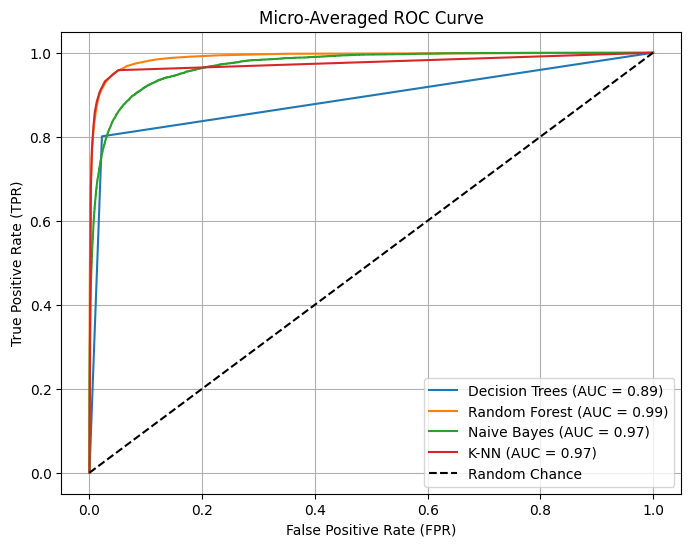

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format # This is done because ROC curve computation requires binary labels.    
y_test_bin = label_binarize(y_test,classes=range(10))

#For each classification model:
#For Decision Trees``
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)

# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

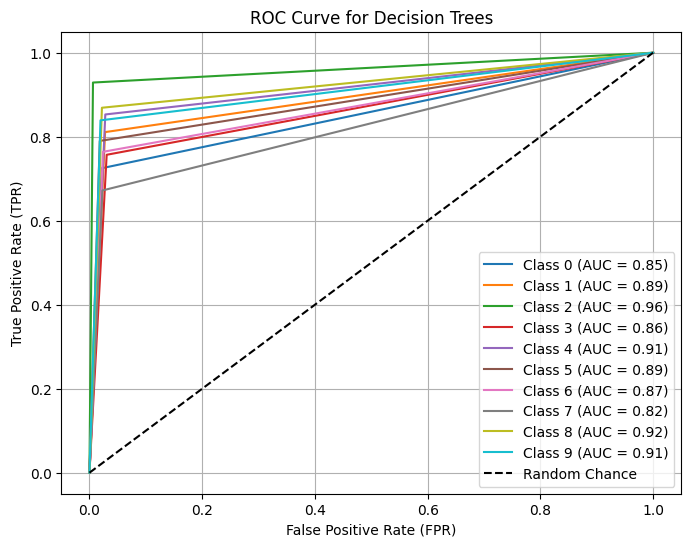

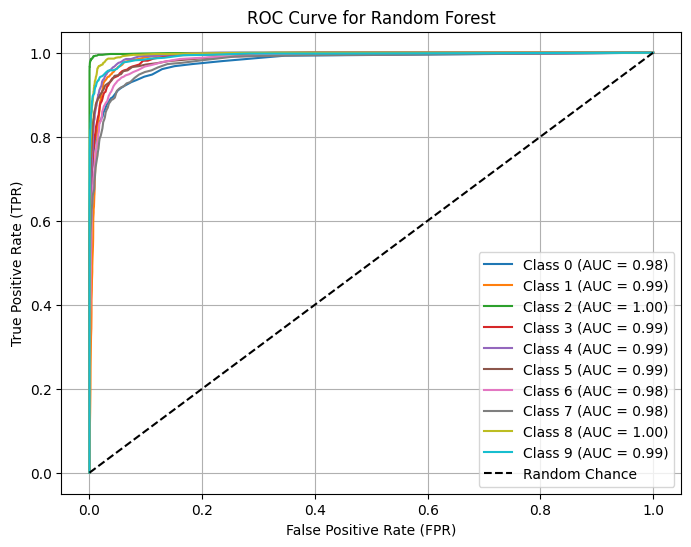

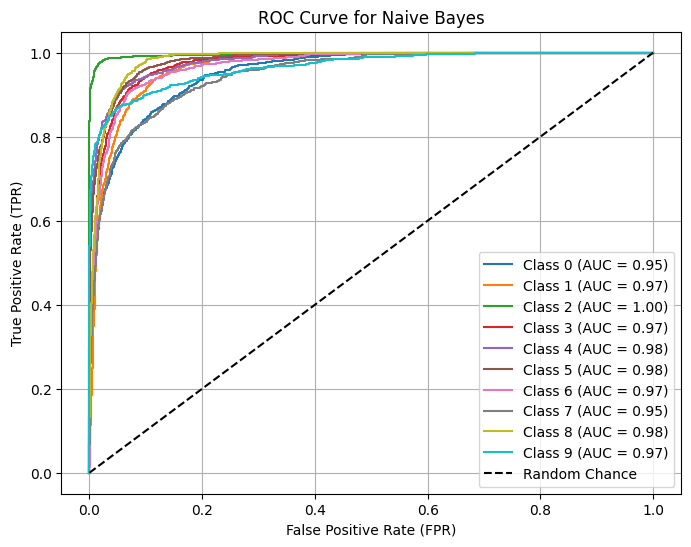

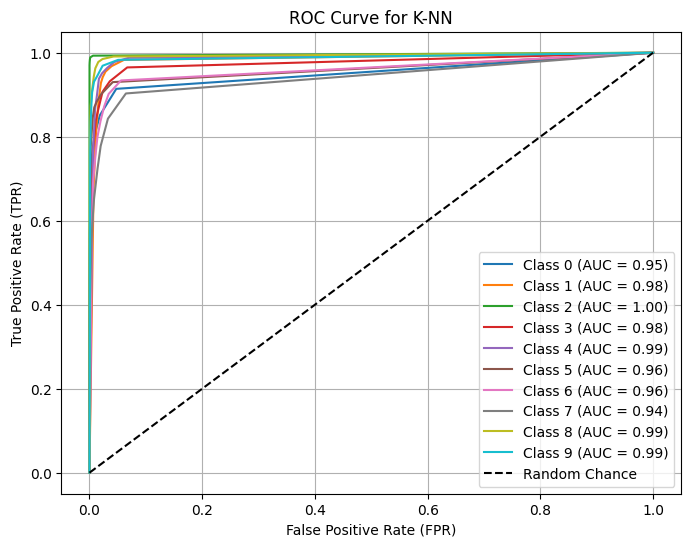

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Try to repeat the same experiment for different component size : 15,20,25,30
#### WHEN the PCA component is 20

In [27]:
#So now we have train and test images of data in 10 dimension instead of 28X28 dimension.

#reshapes the training data X_train into a two-dimensional array, where each row represents a sample and each column represents a feature.
X_train_2d = X_train.reshape(X_train.shape[0],-1)  #X train numpy array or Pd dataframe #(X_train.shape[0], -1), the tuple specifies the dimensions to which you want to reshape the array X_train.

#reshapes the test data X_test in the same manner.
X_test_2d = X_test.reshape(X_test.shape[0],-1)

# Perform PCA with 10 components
pca = PCA(n_components=20)

# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train_2d)

# Transform the test data using the PCA learned from the training data
X_test_pca = pca.transform(X_test_2d)

## Decision Trees

In [29]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.7996
Decision Tree F1-score: 0.7986162238914492
Decision Tree Recall: 0.7996
Decision Tree ROC-AUC: 0.8886666666666667
Decision Tree Confusion Matrix:
[[733 140  10  33   3   5   8   6  39  23]
 [ 88 800  11  26   8  14   9   8  20  16]
 [  4   2 938  10   1  21   9   9   3   3]
 [ 23  11  12 781  30  34  25  65   7  12]
 [  0   2   2  48 828  48  12  17  17  26]
 [ 11   7   7  20 128 777  11  10  19  10]
 [  7   5   5  39  20  22 796  75   4  27]
 [  9  13  10  58  31   7 135 655  14  68]
 [ 36  16  16   2  15  22   2   2 864  25]
 [ 10  36   6   4  24  13   7  12  64 824]]


## Random Forest

In [30]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.9041
Random Forest F1-score: 0.9035361208464261
Random Forest Recall: 0.9041
Random Forest ROC-AUC: 0.9932608999999999
Random Forest Confusion Matrix [[806 143   1  21   5   0   2   2  14   6]
 [ 17 936   1  22   2   3   0   2  12   5]
 [  3   1 985   2   0   5   1   1   1   1]
 [  8  10   2 928  11  16   3  20   2   0]
 [  0   1   0  20 945  16   2   3   8   5]
 [  0   2   0   9 102 874   2   4   4   3]
 [  2   3   2  21  17  21 900  13   4  17]
 [  8   6   0  37  28   3  96 781   4  37]
 [ 15   3   1   0   3   5   3   0 969   1]
 [  4   6   0   0  14   1   8   2  48 917]]


## Naive Bayes 

In [32]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7968
Naive Bayes F1-score: 0.7954383964073155
Naive Bayes Recall: 0.7968
Naive Bayes ROC-AUC: 0.9766958555555554
Naive Bayes Confusion Matrix:
[[623 229  15  46   9   0   2  11  56   9]
 [ 16 802   2  90   9   7   0   3  56  15]
 [ 15   1 973   4   0   4   2   0   0   1]
 [ 18   9   2 806  34  19  22  90   0   0]
 [  2   0   0  21 880  28   4  21  31  13]
 [  0   1   5  36 180 731   4  24  16   3]
 [  7   5  37  14  25  50 807  40   1  14]
 [ 10  11   4  46  33   1 181 696   4  14]
 [ 98  26  25   2   2   5   1   3 829   9]
 [ 14  10   5   0  20   0   8  15 107 821]]


## KNN Classifier

In [33]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9203
K-NN F1-score: 0.9200555926523132
K-NN Recall: 0.9203000000000001
K-NN ROC-AUC: 0.9844568166666667
K-NN Confusion Matrix
[[816 149   0  14   7   0   1   0   8   5]
 [  8 972   0   8   5   0   0   0   5   2]
 [  2   2 990   2   0   2   2   0   0   0]
 [  9  17   2 922  17  18   1  13   1   0]
 [  0   1   0   6 978   6   2   1   2   4]
 [  0   0   0  10  96 890   2   0   2   0]
 [  1   4   0   6  30  10 918  19   0  12]
 [ 10   3   0  31  38   4  97 799   1  17]
 [ 16   5   2   0   2   4   3   0 967   1]
 [  3   6   0   0  14   3   9   1  13 951]]


## SVM

In [34]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9308
SVM F1-score: 0.9304489821151387
SVM Recall: 0.9307999999999998
SVM ROC-AUC: 0.9968470555555555
SVM confusion Matrix
[[854 112   0  15   3   0   0   4   9   3]
 [  8 966   0  12   3   0   2   1   5   3]
 [  3   0 990   3   0   2   1   0   1   0]
 [  6   6   4 930  16  21   2  15   0   0]
 [  0   1   0   8 972   6   2   0   5   6]
 [  0   1   0   8  75 909   2   1   4   0]
 [  0   2   0   6  20  15 935   8   0  14]
 [ 16   9   0  27  18   2  74 823   0  31]
 [  8   2   1   0   2   1   1   0 982   3]
 [  4   7   0   0  13   0   2   0  27 947]]


## performing incremental PCA and reducing the size to 20 components

In [35]:
from sklearn.decomposition import IncrementalPCA

# Reshape the training and test data to 2D
x_train_2d = X_train.reshape(X_train.shape[0], -1)
x_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create and fit Incremental PCA
ipca = IncrementalPCA(n_components=10, batch_size=1000)
for batch in np.array_split(x_train_2d, len(x_train_2d) // 1000):
 ipca.partial_fit(batch)

# Transform the data using IPCA
x_train_ipca = ipca.transform(x_train_2d)
x_test_ipca = ipca.transform(x_test_2d)

# Print the shape of the transformed data
print("Training data shape after IPCA:", x_train_ipca.shape)
print("Test data shape after IPCA:", x_test_ipca.shape)

Training data shape after IPCA: (60000, 10)
Test data shape after IPCA: (10000, 10)


In [36]:
'x_train_ipca','x_test_ipca'

('x_train_ipca', 'x_test_ipca')

## Decision Trees

In [38]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier,x_train_ipca, y_train, x_test_ipca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.805
Decision Tree F1-score: 0.8042582082349081
Decision Tree Recall: 0.805
Decision Tree ROC-AUC: 0.8916666666666666
Decision Tree Confusion Matrix:
[[728 148  13  24   6   6   5  11  44  15]
 [ 83 803   7  24   8  13   8  10  28  16]
 [  5   6 935  15   2   8  11   5   8   5]
 [ 18  13   4 772  31  41  28  57  23  13]
 [  5   3   2  54 834  45  12   7  20  18]
 [  1   9  12  18 120 794  12  10  11  13]
 [  6   9   6  57  20  28 764  79  12  19]
 [ 12   9   2  81  27  10 130 678  12  39]
 [ 37  12   7   5   3  15   1   3 898  19]
 [ 14  25   2   6  22   8  14   9  56 844]]


## RAndom Forest

In [39]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8765
Random Forest F1-score: 0.8760834164364525
Random Forest Recall: 0.8765000000000001
Random Forest ROC-AUC: 0.9895758222222222
Random Forest Confusion Matrix [[775 157   2  27   5   1   2   3  21   7]
 [ 26 907   1  24   5   6   1   2  19   9]
 [  4   2 979   3   1   7   0   2   2   0]
 [ 11  11   0 887  15  22   9  28  16   1]
 [  0   2   0  37 912  32   0   3   8   6]
 [  0   4   1  11 121 847   3   3   6   4]
 [  3  11   0  57  10  33 837  36   1  12]
 [  6   9   0  55  25   2 104 760   9  30]
 [  9   8   1   3   2   8   2   0 965   2]
 [  6   8   0   4  19   1   6   1  59 896]]


## NAive Bayes

In [41]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7627
Naive Bayes F1-score: 0.7614761019280496
Naive Bayes Recall: 0.7626999999999999
Naive Bayes ROC-AUC: 0.9714617333333333
Naive Bayes Confusion Matrix:
[[612 208   8  91   5   0   1  16  46  13]
 [ 13 725  10 154   5   0   0   1  68  24]
 [  9   1 945   6   0  34   1   3   1   0]
 [ 14   6   6 871  26  15  21  41   0   0]
 [  1   0   1  57 862  41   1   3  25   9]
 [  0   2  15  47 171 725   5  22   5   8]
 [  5   6  53  49  17  49 726  75   8  12]
 [ 15  15   3 193  26   1 174 553   2  18]
 [ 95  31  20   7   3   9   3   3 821   8]
 [ 13  20   1  23  29   0   1  17 109 787]]


## KNN Classifier

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8835
K-NN F1-score: 0.8826611711889891
K-NN Recall: 0.8835000000000001
K-NN ROC-AUC: 0.9738341444444444
K-NN Confusion Matrix
[[789 166   1  22   3   0   2   0  13   4]
 [ 19 940   0  16   4   2   1   1  10   7]
 [  4   1 981   3   0   7   1   2   1   0]
 [ 10  13   0 888  26  22   3  18  20   0]
 [  0   1   0  17 947  24   1   1   4   5]
 [  0   4   0  12 126 845   2   2   4   5]
 [  2   7   0  38  20  20 846  54   1  12]
 [  7  11   0  58  26   5 141 721   7  24]
 [ 12   4   3   1   1   8   2   0 966   3]
 [  6   8   0   0  26   0   6   2  40 912]]


## SVM

In [43]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8933
SVM F1-score: 0.8926762445795117
SVM Recall: 0.8933
SVM ROC-AUC: 0.993037611111111
SVM confusion Matrix
[[813 134   1  24   3   0   0   3  14   8]
 [ 21 927   0  21   1   3   2   4  13   8]
 [  2   2 983   3   0   5   0   2   2   1]
 [  8   8   0 886  20  24  11  27  15   1]
 [  0   1   0   9 955  20   0   2   5   8]
 [  0   3   0   5 121 857   6   2   3   3]
 [  1   7   1  46  20  32 849  28   3  13]
 [  6  14   0  40  14   4 109 766   9  38]
 [  7   3   3   4   3   4   0   0 974   2]
 [  3   8   0   0  21   0   6   1  38 923]]
